In [11]:
import pandas as pd
import os

# Definir o caminho para o diretório onde os arquivos CSV estão localizados
base_dir = os.path.join('..', 'Data', 'PRSA2017_Data_20130301-20170228')

file_paths = [
    os.path.join(base_dir, 'PRSA_Data_Aotizhongxin_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Changping_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Dingling_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Dongsi_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Guanyuan_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Gucheng_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Huairou_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Nongzhanguan_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Shunyi_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Tiantan_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Wanliu_20130301-20170228.csv'),
    os.path.join(base_dir, 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')
]

# Carregar uma amostra dos dados de cada arquivo para entender a estrutura
sample_data = []
for fp in file_paths:
    try:
        sample = pd.read_csv(fp, nrows=5)
        sample_data.append(sample)
    except Exception as e:
        print(f"Erro ao ler {fp}: {e}")

# Exibir as amostras
for i, sample in enumerate(sample_data):
    print(f"Arquivo {file_paths[i]}:\n{sample}\n")

Arquivo ..\Data\PRSA2017_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2   CO  O3  TEMP    PRES  \
0   1  2013      3    1     0      4     4    4    7  300  77  -0.7  1023.0   
1   2  2013      3    1     1      8     8    4    7  300  77  -1.1  1023.2   
2   3  2013      3    1     2      7     7    5   10  300  73  -1.1  1023.5   
3   4  2013      3    1     3      6     6   11   11  300  72  -1.4  1024.5   
4   5  2013      3    1     4      3     3   12   12  300  72  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8     0  NNW   4.4  Aotizhongxin  
1 -18.2     0    N   4.7  Aotizhongxin  
2 -18.2     0  NNW   5.6  Aotizhongxin  
3 -19.4     0   NW   3.1  Aotizhongxin  
4 -19.5     0    N   2.0  Aotizhongxin  

Arquivo ..\Data\PRSA2017_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2   CO  O3  TEMP    PRES  \
0   1  2013   

Todos os arquivos seguem a mesma estrutura, com colunas representando dados meteorológicos e de poluentes do ar por hora. As colunas são:

No: índice da linha

year, month, day, hour: data/hora da coleta

PM2.5, PM10: material particulado

SO2, NO2, CO, O3: poluentes atmosféricos

TEMP: temperatura (°C)

PRES: pressão atmosférica (hPa)

DEWP: ponto de orvalho (°C)

RAIN: precipitação (mm)

wd: direção do vento

WSPM: velocidade do vento (m/s)

station: estação de monitoramento



🔍 1. Entendimento Inicial e Unificação dos Dados
Técnica: Concatenar os arquivos em um único DataFrame.
Por quê: Permite analisar padrões gerais e comparações entre estações.

In [12]:
# Ler e combinar os arquivos
dfs = [pd.read_csv(fp) for fp in file_paths]
df_all = pd.concat(dfs, ignore_index=True)


📊 2. Análise Descritiva
Técnicas:

.describe() para estatísticas básicas

.isnull().sum() para identificação de nulos

.dtypes para verificar os tipos de dados

Por quê: Fundamental para entender a distribuição, médias, presença de outliers e dados ausentes.

In [13]:
print(df_all.head())
print(df_all.info())
print(df_all.describe())
print(df_all.isnull().sum())
print(df_all.dtypes)

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     4

📉 3. Análise Temporal
Como os dados são coletados ao longo do tempo, visualizar as séries temporais é crucial.

Técnicas:
Criar coluna datetime com pd.to_datetime

Plotar séries temporais de poluentes e clima

Por quê: Identificar tendências sazonais, variações diárias e anomalias no tempo.

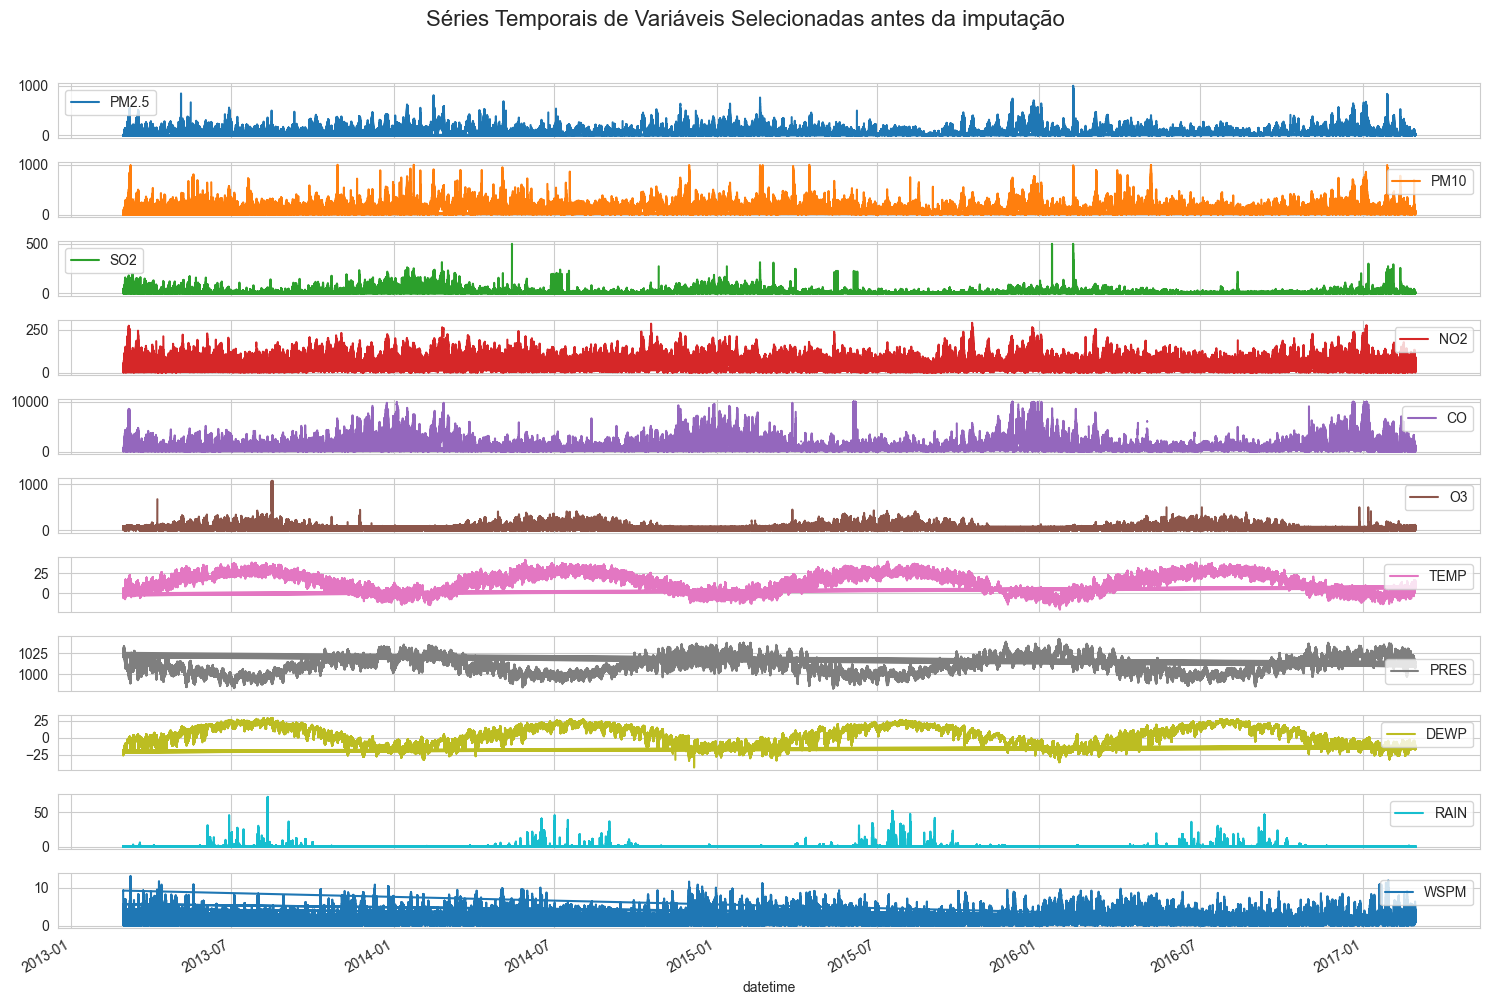

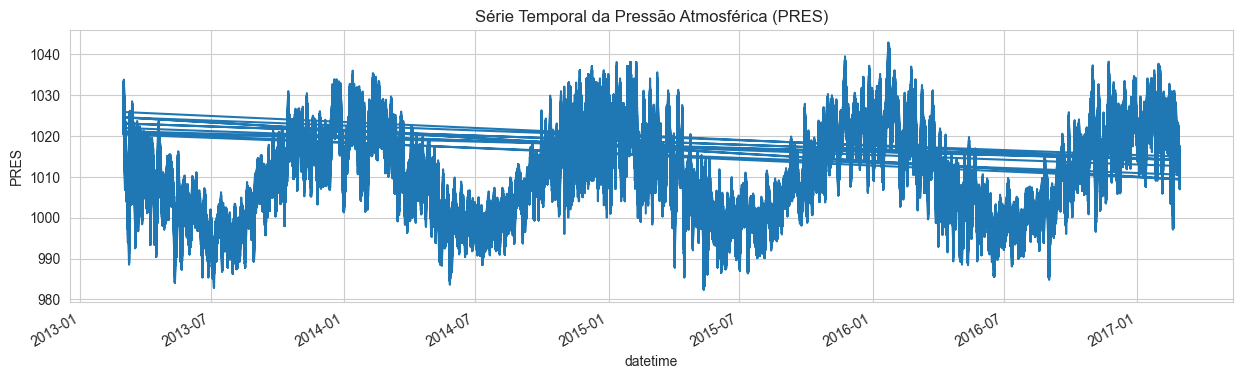

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar coluna datetime
df_all["datetime"] = pd.to_datetime(df_all[["year", "month", "day", "hour"]])

# Configurar o estilo dos gráficos
sns.set_style("whitegrid")

# Plotar algumas séries temporais
# Usaremos o DataFrame df_all com o índice datetime definido anteriormente

# Lista de colunas para plotar (selecione algumas das suas colunas de interesse)
cols_to_plot_ts = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

# Filtrar colunas que realmente existem no DataFrame
cols_to_plot_ts = [col for col in cols_to_plot_ts if col in df_all.columns]

if cols_to_plot_ts:
    # Plotar as séries temporais das colunas selecionadas
    df_all.set_index("datetime")[cols_to_plot_ts].plot(subplots=True, figsize=(15, 10), layout=(-1, 1))
    plt.suptitle('Séries Temporais de Variáveis Selecionadas antes da imputação', y=1.00, size=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar layout para não sobrepor o suptitle
    plt.show()

else:
    print("\nNenhuma das colunas selecionadas para plotagem de séries temporais está presente no DataFrame.")

# Você pode adicionar plots de séries temporais para outras variáveis separadamente se quiser
# Por exemplo, a pressão atmosférica
if 'PRES' in df_all.columns:
    df_all.set_index("datetime")['PRES'].plot(figsize=(15, 4))
    plt.title('Série Temporal da Pressão Atmosférica (PRES)')
    plt.ylabel('PRES')
    plt.show()


1. **Análise de Dados Faltantes**
Agora, vamos analisar a quantidade e a porcentagem de dados faltantes em cada coluna.


Contagem de valores faltantes por coluna:
No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

Porcentagem de valores faltantes por coluna:
CO          4.919813
O3          3.155421
NO2         2.879497
SO2         2.143937
PM2.5       2.076916
PM10        1.532674
wd          0.433018
DEWP        0.095777
TEMP        0.094589
PRES        0.093401
RAIN        0.092688
WSPM        0.075576
month       0.000000
No          0.000000
year        0.000000
hour        0.000000
day         0.000000
station     0.000000
datetime    0.000000
dtype: float64


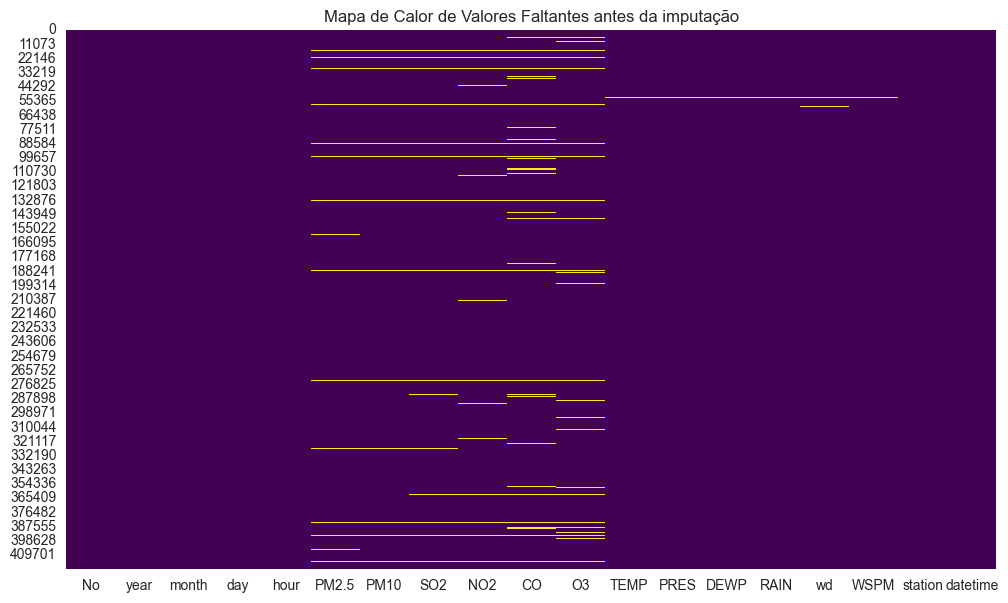

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de valores faltantes por coluna
missing_values_count = df_all.isnull().sum()
print("\nContagem de valores faltantes por coluna:")
print(missing_values_count)

# Porcentagem de valores faltantes por coluna
total_rows = len(df_all)
missing_values_percentage = (missing_values_count / total_rows) * 100
print("\nPorcentagem de valores faltantes por coluna:")
print(missing_values_percentage.sort_values(ascending=False))

# Visualização de dados faltantes
plt.figure(figsize=(12, 7))
sns.heatmap(df_all.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes antes da imputação')
plt.show()

**2. Análise Univariada**

Vamos analisar a distribuição de cada variável individualmente.

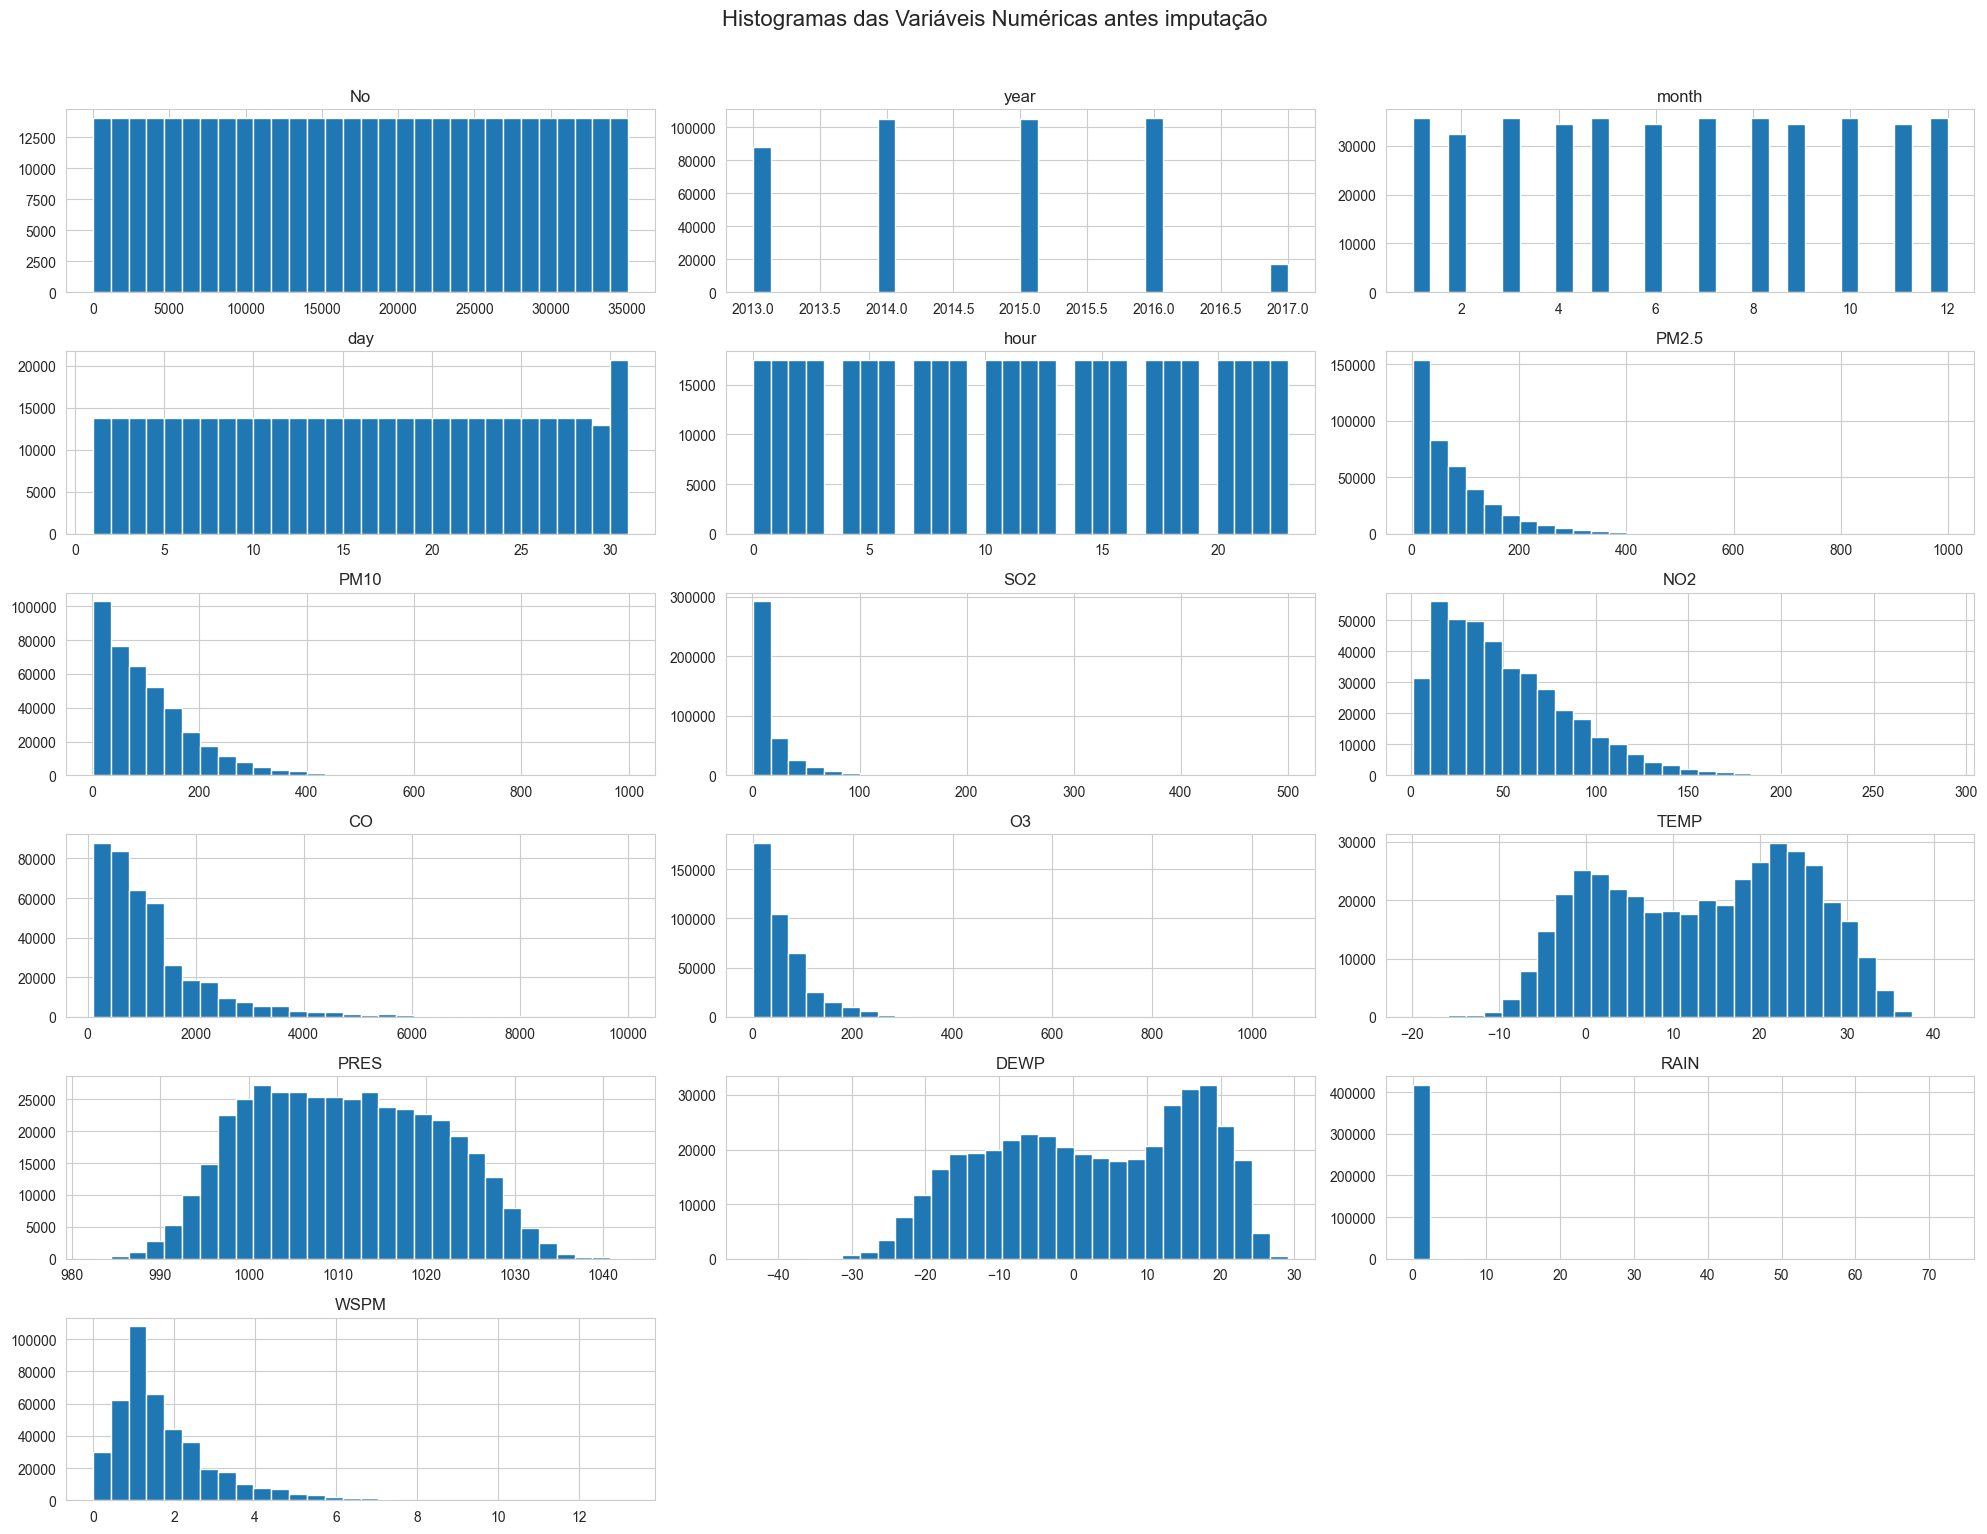

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Armazenar colunas não numéricas para reinserir depois
non_numeric = df_all[["station", "wd", "datetime"]]
numeric_df = df_all.drop(columns=["station", "wd", "datetime"])

# Usar o DataFrame com apenas colunas numéricas
numeric_cols = numeric_df.columns

# Plotar histogramas para cada variável numérica
numeric_df[numeric_cols].hist(bins=30, figsize=(20, 15), layout=(-1, 3))
plt.suptitle('Histogramas das Variáveis Numéricas antes imputação', y=1.02, size=16)
plt.tight_layout()
plt.show()

**3. Análise Bivariada**

Vamos explorar as relações entre pares de variáveis.

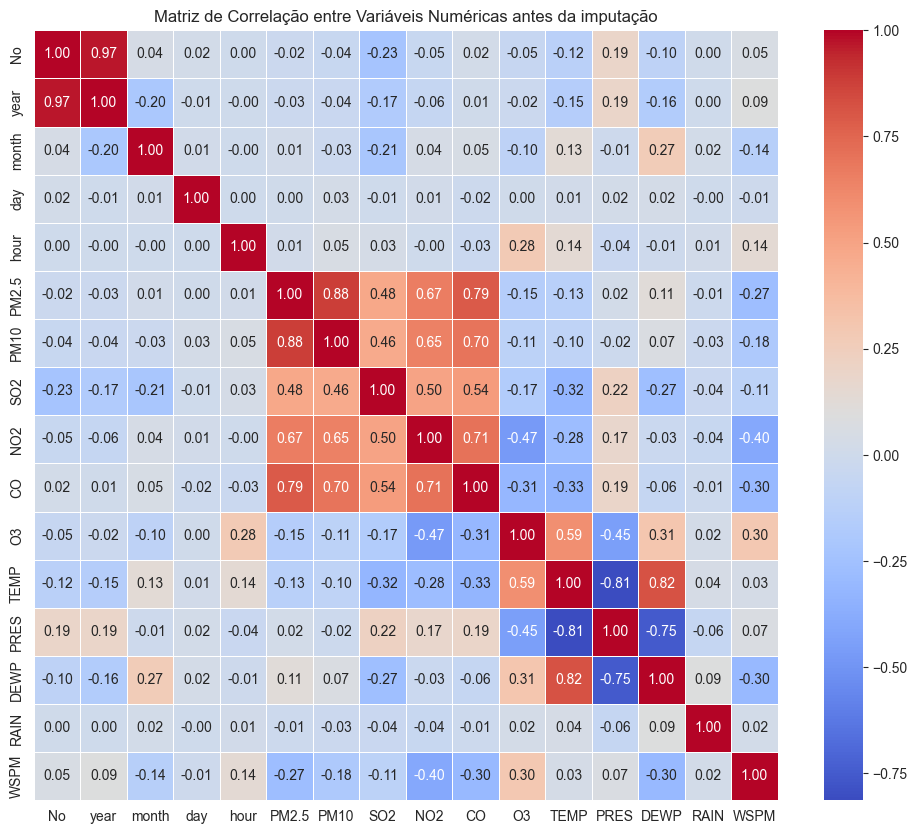

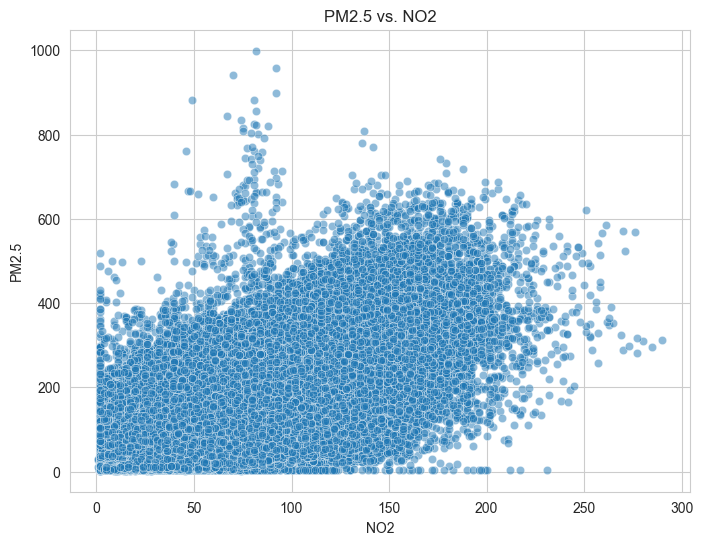

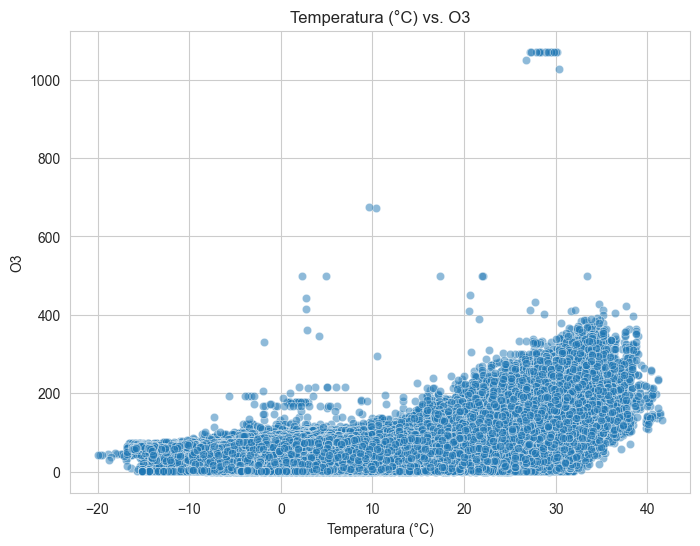

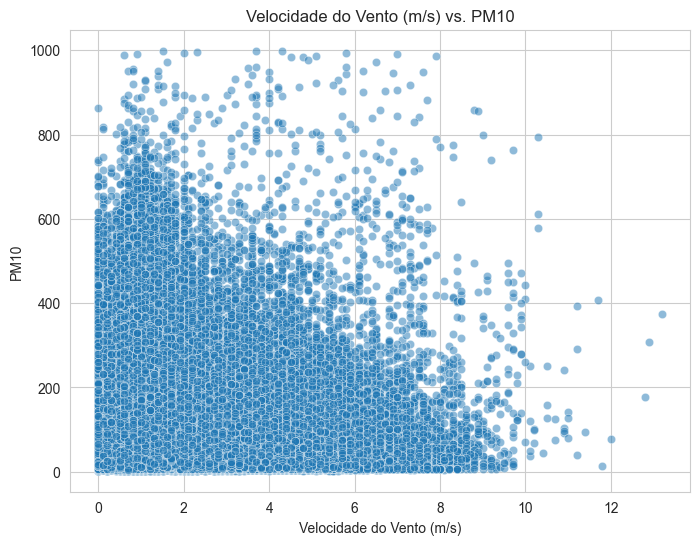

In [17]:
# Matriz de Correlação
# Selecionar apenas colunas numéricas para a matriz de correlação
# Já temos numeric_df, então podemos usar diretamente
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas antes da imputação')
plt.show()

# Scatter plots entre algumas variáveis de interesse
# Escolha variáveis relevantes do seu conjunto de dados para visualizar correlações.
# Exemplos: PM2.5 vs. NO2, TEMP vs. O3, WSPM vs. PM10

# Exemplo 1: PM2.5 vs. NO2
if 'PM2.5' in numeric_df.columns and 'NO2' in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='NO2', y='PM2.5', data=numeric_df, alpha=0.5)
    plt.title('PM2.5 vs. NO2')
    plt.xlabel('NO2')
    plt.ylabel('PM2.5')
    plt.grid(True)
    plt.show()

# Exemplo 2: TEMP vs. O3
if 'TEMP' in numeric_df.columns and 'O3' in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TEMP', y='O3', data=numeric_df, alpha=0.5)
    plt.title('Temperatura (°C) vs. O3')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('O3')
    plt.grid(True)
    plt.show()

# Exemplo 3: WSPM vs. PM10
if 'WSPM' in numeric_df.columns and 'PM10' in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='WSPM', y='PM10', data=numeric_df, alpha=0.5)
    plt.title('Velocidade do Vento (m/s) vs. PM10')
    plt.xlabel('Velocidade do Vento (m/s)')
    plt.ylabel('PM10')
    plt.grid(True)
    plt.show()

⚠️ 4. Tratamento de Valores Ausentes
Técnicas:

Imputação com Knn

Imputação com média/médiana (curto prazo)

Interpolação temporal (.interpolate())

Exclusão se for insignificante ou com muitos nulos

Por quê: Manter integridade das séries temporais e evitar viés na modelagem.

In [18]:
# --- ESTRATÉGIA DE IMPUTAÇÃO PROPOSTA ---
print("\n--- TRATAMENTO DE DADOS FALTANTES ---")
# Usar o DataFrame resultante da imputação anterior (se houver), ou o original df_all
# Se estiver rodando esta célula separadamente, use df_all.

df_imputed = df_all.copy()

# Estratégia: Interpolação linear para todas as colunas numéricas.
# É boa para séries temporais e geralmente lida bem com a maioria dos dados neste dataset.
# Verificar se ainda há valores faltantes antes de interpolar
missing_after_previous_step = df_imputed.isnull().sum()
missing_after_previous_step = missing_after_previous_step[missing_after_previous_step > 0]

if not missing_after_previous_step.empty:
    print("\nAplicando Interpolação Linear para valores faltantes restantes...")
    # Iterar apenas sobre as colunas que ainda possuem valores faltantes e são numéricas
    numeric_cols_with_missing = missing_after_previous_step.index.intersection(df_imputed.select_dtypes(include=np.number).columns)

    if not numeric_cols_with_missing.empty:
        for col in numeric_cols_with_missing:
            print(f"Interpolando coluna: {col}")
            df_imputed[col].interpolate(method='linear', limit_direction='both', inplace=True)

        print("\nVerificando valores faltantes após Interpolação Linear:")
        print(df_imputed.isnull().sum()[df_imputed.isnull().sum() > 0])
    else:
        print("Não há colunas numéricas restantes com valores faltantes para interpolar.")

else:
    print("\nNenhum valor faltante restante para aplicar interpolação linear.")

print("\nPrimeiras linhas do DataFrame após interpolação (se aplicada):")
print(df_imputed.head())


--- TRATAMENTO DE DADOS FALTANTES ---

Aplicando Interpolação Linear para valores faltantes restantes...
Interpolando coluna: PM2.5
Interpolando coluna: PM10
Interpolando coluna: SO2
Interpolando coluna: NO2
Interpolando coluna: CO
Interpolando coluna: O3
Interpolando coluna: TEMP
Interpolando coluna: PRES
Interpolando coluna: DEWP


C:\Users\Roger\AppData\Local\Temp\ipykernel_28116\3024203321.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].interpolate(method='linear', limit_direction='both', inplace=True)


Interpolando coluna: RAIN
Interpolando coluna: WSPM

Verificando valores faltantes após Interpolação Linear:
wd    1822
dtype: int64

Primeiras linhas do DataFrame após interpolação (se aplicada):
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station            datetime  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00:

In [ ]:
from sklearn.preprocessing import StandardScaler # Usaremos StandardScaler para escalonamento
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

def fill_wd_mode(group):
    mode = group.mode()
    return mode[0] if not mode.empty else "calm"


# --- TRATAMENTO DE DADOS FALTANTES COM KNNIMPUTER ---
print("\n--- TRATAMENTO DE DADOS FALTANTES COM KNNIMPUTER ---")

# Usar o DataFrame que já foi criado e combinado: df_all
df_imputed_knn = df_all.copy()

# Selecionar apenas colunas numéricas para imputação
# Excluir colunas de data/hora, 'No', 'station' e 'wd' se estiverem no DataFrame numérico
# As colunas a serem excluídas dependem de como você definiu 'numeric_df' anteriormente.
# Se 'numeric_df' já excluiu essas colunas, você pode usar numeric_df diretamente.
# Se 'df_all' ainda contiver colunas não numéricas que você não quer imputar, filtre-as.
# Assumindo que você quer imputar as mesmas colunas que usou para análise univariada e bivariada:
numeric_cols_for_imputation = numeric_df.columns # Usar as colunas já filtradas como numéricas

if df_imputed_knn.empty or numeric_cols_for_imputation.empty:
    print("DataFrame vazio ou sem colunas numéricas para imputação.")
elif not df_imputed_knn[numeric_cols_for_imputation].isnull().values.any():
    print("Não há dados faltantes nas colunas numéricas para imputar com KNNImputer.")
else:
    print("Valores faltantes encontrados. Prosseguindo com KNN Imputation.")

    # Salvar o índice e nomes de colunas numéricas para reconstrução
    original_index = df_imputed_knn.index
    original_numeric_columns = numeric_cols_for_imputation.tolist()

    # 1. Escalonamento dos dados numéricos
    scaler = StandardScaler()
    # Certifique-se de que estamos trabalhando com uma cópia para evitar SettingWithCopyWarning
    # Escalonar apenas as colunas numéricas selecionadas para imputação
    df_numeric_for_scaling = df_imputed_knn[original_numeric_columns].copy()
    df_numeric_scaled = scaler.fit_transform(df_numeric_for_scaling)


    # 2. Aplicação do KNNImputer
    k_neighbors = 5 # Um valor comum para k
    print(f"\nAplicando KNNImputer com k={k_neighbors}...")
    imputer_knn = KNNImputer(n_neighbors=k_neighbors)

    # O imputer retorna um array numpy
    imputed_scaled_values = imputer_knn.fit_transform(df_numeric_scaled)

    # 3. Reversão da Escala
    imputed_values_original_scale = scaler.inverse_transform(imputed_scaled_values)

    # 4. Reconstruir o DataFrame com os dados numéricos imputados
    df_temp_imputed_numeric = pd.DataFrame(imputed_values_original_scale, columns=original_numeric_columns, index=original_index)

    # Juntar de volta com colunas não numéricas (se houver)
    # Identificar colunas não numéricas que não foram imputadas
    non_numeric_cols = df_imputed_knn.columns.difference(original_numeric_columns)
    df_non_numeric = df_imputed_knn[non_numeric_cols].copy()

    if not df_non_numeric.empty:
        df_imputed_knn = pd.concat([df_non_numeric, df_temp_imputed_numeric], axis=1)
    else:
        df_imputed_knn = df_temp_imputed_numeric

    # Reordenar colunas para a ordem original do DataFrame original 'df_all'
    # (considerando que 'NMHC(GT)' pode ter sido removida - embora essa coluna não esteja no seu dataset)
    final_columns_order = [col for col in df_all.columns if col in df_imputed_knn.columns]
    df_imputed_knn = df_imputed_knn[final_columns_order]


    print("\nValores faltantes após KNN Imputation:")
    remaining_missing_knn = df_imputed_knn.isnull().sum()
    print(remaining_missing_knn[remaining_missing_knn > 0])

    if remaining_missing_knn.sum() == 0:
        print("Nenhum valor faltante restante após KNN Imputation.")
    else:
        print("ATENÇÃO: Valores faltantes ainda presentes após KNN Imputation.")
        print("Isso pode ocorrer se todas as features de um vizinho também forem NaN para uma dada amostra,")
        print("ou se houver linhas/colunas inteiras de NaNs que o scaler/imputer não conseguiu processar.")
        print("Aplicando moda como último recurso para os faltantes restantes...")

        # Começar com df_imputed_knn (resultado do KNN)
        df_imputed_knn["wd"] = df_imputed_knn["wd"].astype(str).replace("nan", pd.NA)  # Corrige strings 'nan'

        # Aplicar preenchimento com moda por estação e hora
        df_imputed_knn["hour"] = df_imputed_knn["datetime"].dt.hour
        df_imputed_knn["wd"] = df_imputed_knn.groupby(["station", "hour"])["wd"].transform(
        lambda x: x.fillna(fill_wd_mode(x))
        )

        final_check_missing = df_imputed_knn.isnull().sum()
        print("\nValores faltantes após moda por estação e hora de último recurso:")
        print(final_check_missing[final_check_missing > 0])
        if final_check_missing.sum() == 0:
             print("Nenhum valor faltante restante após moda por estação e hora.")
        else:
             print("Ainda há valores faltantes após moda por estação e hora. Considere outras estratégias ou investigação.")


--- TRATAMENTO DE DADOS FALTANTES COM KNNIMPUTER ---
Valores faltantes encontrados. Prosseguindo com KNN Imputation.

Aplicando KNNImputer com k=5...

Valores faltantes após KNN Imputation:
wd    1822
dtype: int64
ATENÇÃO: Valores faltantes ainda presentes após KNN Imputation.
Isso pode ocorrer se todas as features de um vizinho também forem NaN para uma dada amostra,
ou se houver linhas/colunas inteiras de NaNs que o scaler/imputer não conseguiu processar.
Aplicando moda como último recurso para os faltantes restantes...

Valores faltantes após ffill/bfill de último recurso:
Series([], dtype: int64)
Nenhum valor faltante restante após ffill/bfill.



--- VERIFICANDO VALORES FALTANTES APÓS IMPUTAÇÃO ---

Contagem de valores faltantes por coluna (após imputação):
Series([], dtype: int64)

Porcentagem de valores faltantes por coluna (após imputação):
Series([], dtype: float64)


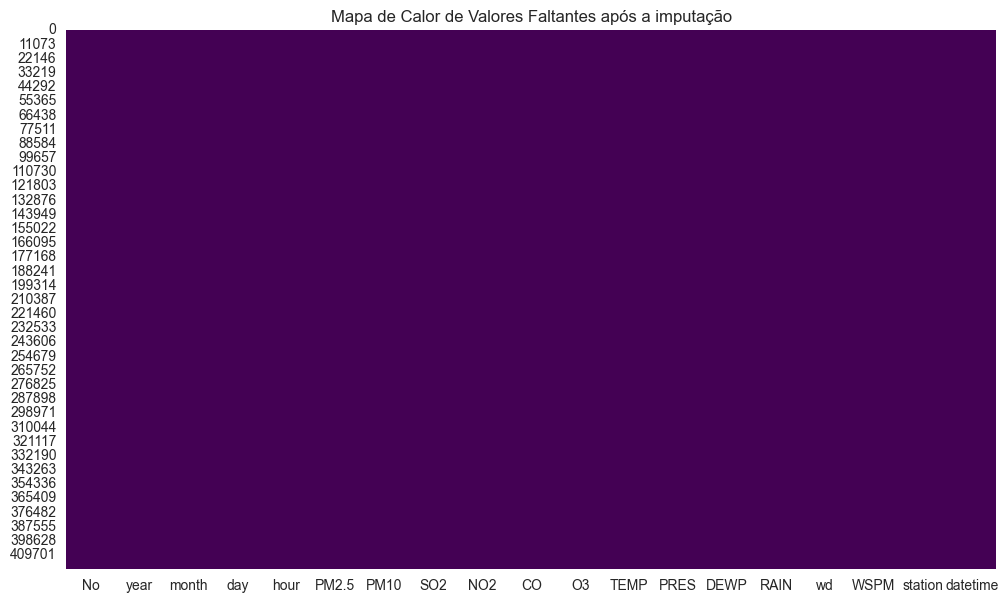


Excelente! Não há valores faltantes restantes no DataFrame após a imputação.


In [20]:
# --- VERIFICANDO VALORES FALTANTES APÓS IMPUTAÇÃO ---
print("\n--- VERIFICANDO VALORES FALTANTES APÓS IMPUTAÇÃO ---")

# Usar o DataFrame após a última etapa de imputação.
# Assumindo que a última etapa foi a interpolação, use df_imputed.
# Se a última etapa foi KNNImputer, use df_imputed_knn.
# Ajuste a variável abaixo conforme o DataFrame mais recente que você quer verificar.
df_after_imputation = df_imputed_knn.copy()

# Contagem de valores faltantes por coluna
missing_values_count_after = df_after_imputation.isnull().sum()
print("\nContagem de valores faltantes por coluna (após imputação):")
print(missing_values_count_after[missing_values_count_after > 0]) # Mostrar apenas colunas com faltantes


# Porcentagem de valores faltantes por coluna
total_rows = len(df_after_imputation)
missing_values_percentage_after = (missing_values_count_after / total_rows) * 100
print("\nPorcentagem de valores faltantes por coluna (após imputação):")
print(missing_values_percentage_after[missing_values_percentage_after > 0].sort_values(ascending=False)) # Mostrar apenas colunas com faltantes


# Visualização de dados faltantes
plt.figure(figsize=(12, 7))
sns.heatmap(df_after_imputation.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes após a imputação')
plt.show()

# Verificar se há algum valor faltante restante no DataFrame
if missing_values_count_after.sum() == 0:
    print("\nExcelente! Não há valores faltantes restantes no DataFrame após a imputação.")
else:
    print("\nAinda há valores faltantes em algumas colunas após a imputação. Revise as estratégias aplicadas.")

🧪 5. Detecção de Outliers
Técnicas:
Boxplot para PM2.5, PM10, SO2, etc.

IQR ou Z-score para detectar outliers extremos

Por quê: Outliers podem indicar erros de medição ou eventos ambientais importantes.

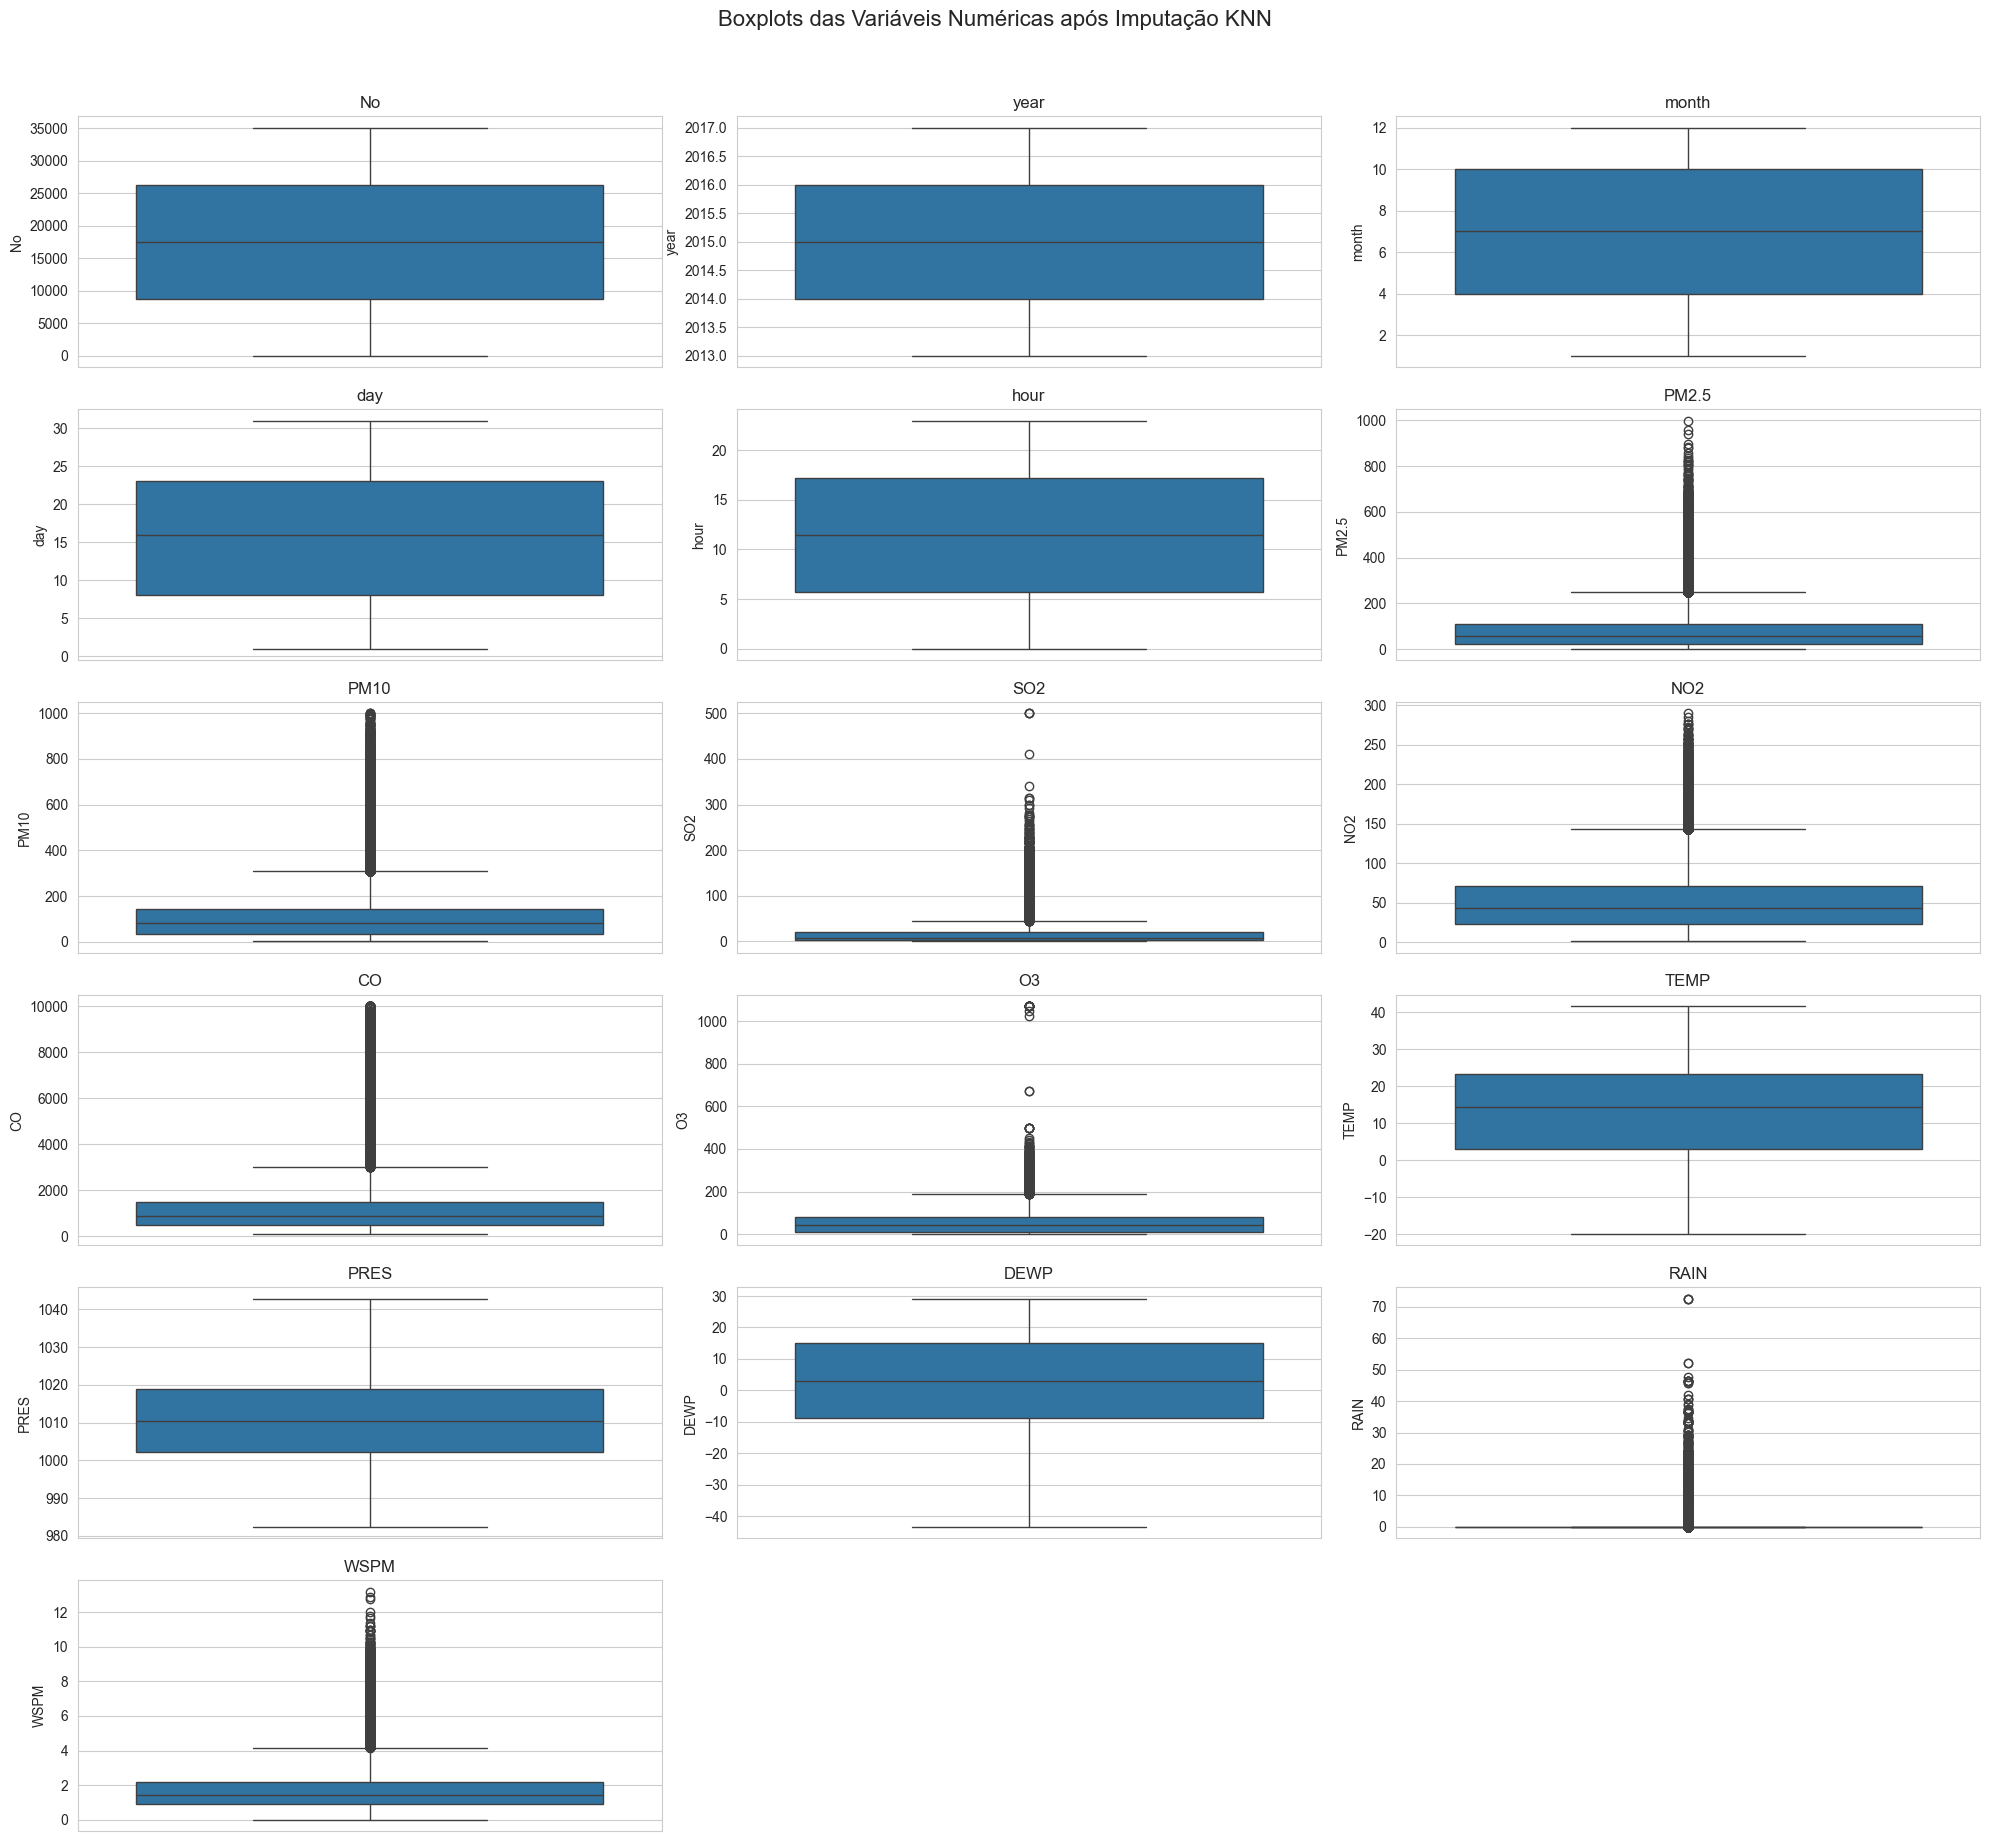

In [21]:
# Plotar boxplots para identificar outliers
# Boxplots para identificar outliers após imputação com KNN
# Use o DataFrame df_imputed_knn para análise após imputação
numeric_df_knn = df_imputed_knn.drop(columns=["station", "wd", "datetime"], errors="ignore")
numeric_cols_knn = numeric_df_knn.columns

plt.figure(figsize=(20, 18))  # Aumentar o tamanho da figura para acomodar mais subplots
for i, col in enumerate(numeric_cols_knn):
    plt.subplot(6, 3, i + 1)  # Ajustar layout para 6x3 para acomodar até 18 plots
    sns.boxplot(y=numeric_df_knn[col])
    plt.title(col)
plt.suptitle('Boxplots das Variáveis Numéricas após Imputação KNN', y=1.02, size=16)
plt.tight_layout()
plt.show()

In [ ]:
print("\nDetectando Outliers usando IQR:")

# Utilize o DataFrame após a imputação KNN para análise de outliers
numeric_df_knn = df_imputed_knn.drop(columns=["station", "wd", "datetime"], errors="ignore")
numeric_cols_knn = numeric_df_knn.columns

# Calcular Q1, Q3 e IQR para cada coluna numérica
Q1 = numeric_df_knn[numeric_cols_knn].quantile(0.25)
Q3 = numeric_df_knn[numeric_cols_knn].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = numeric_df_knn[(numeric_df_knn < lower_bound) | (numeric_df_knn > upper_bound)]

print("\nContagem de Outliers por Coluna (baseado no método IQR):")
print(outliers.notna().sum())

# Opcional: Criar um DataFrame sem os outliers detectados pelo método IQR (substitui outliers por NaN)
df_no_outliers_iqr = numeric_df_knn[~((numeric_df_knn < lower_bound) | (numeric_df_knn > upper_bound))]

print("\nDataFrame sem Outliers (substituídos por NaN):")
print(df_no_outliers_iqr.head())

# Verificar a forma do novo DataFrame
print(f"\nForma do DataFrame numérico após KNN: {numeric_df_knn.shape}")
print(f"Forma do DataFrame sem outliers (substituídos por NaN): {df_no_outliers_iqr.shape}")

# Para remover as linhas COMPLETAS que contêm pelo menos um outlier em qualquer coluna numérica
df_rows_without_outliers = numeric_df_knn.dropna(subset=numeric_cols_knn)
print(f"\nForma do DataFrame com linhas contendo outliers removidas: {df_rows_without_outliers.shape}")


Detectando Outliers usando IQR:

Contagem de Outliers por Coluna (baseado no método IQR):
No           0
year         0
month        0
day          0
hour         0
PM2.5    19605
PM10     15094
SO2      36620
NO2       7188
CO       29607
O3       16408
TEMP         0
PRES         0
DEWP         0
RAIN     16533
WSPM     23108
dtype: int64

DataFrame sem Outliers (substituídos por NaN):
    No    year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0  1.0  2013.0    3.0  1.0     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1  2.0  2013.0    3.0  1.0     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2  3.0  2013.0    3.0  1.0     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3  4.0  2013.0    3.0  1.0     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4  5.0  2013.0    3.0  1.0     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN  WSPM  
0  1023.0 -18.8   0.0   NaN  
1  1023.2 -18.2   0.0   NaN  
2  1023.5 -18.2   0.0   NaN  
3  1024

🔄 6. Análise de Correlação
Técnicas:

Matriz de correlação com .corr()

Mapa de calor (seaborn.heatmap)

Por quê: Identificar relações entre poluentes e variáveis climáticas (e.g., chuva e PM2.5).

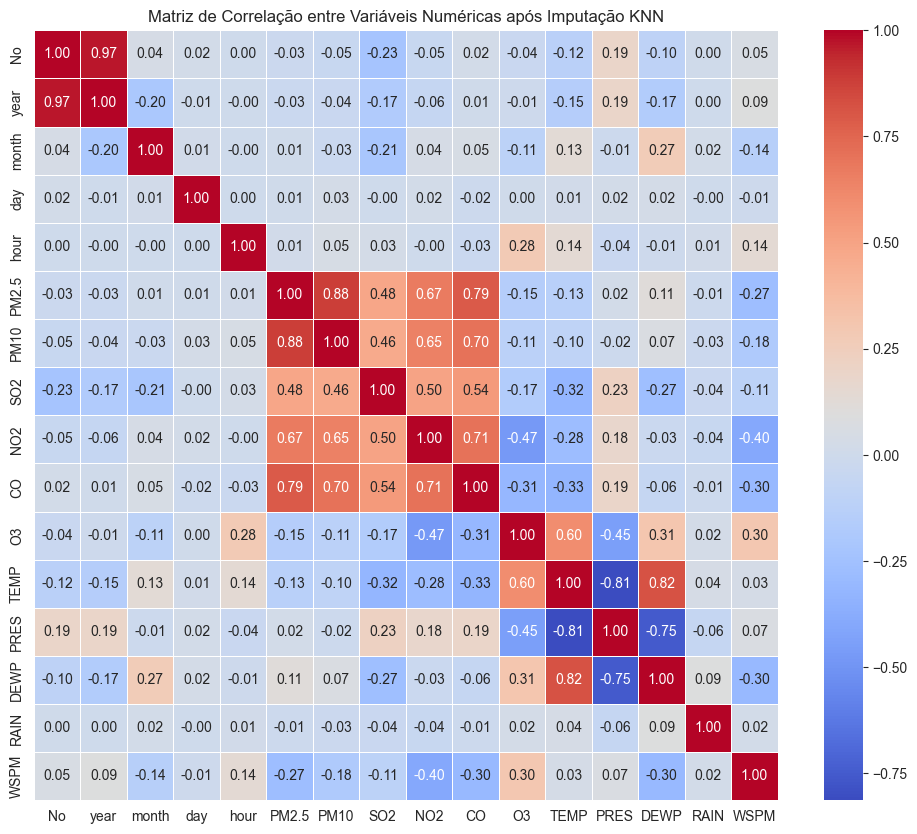

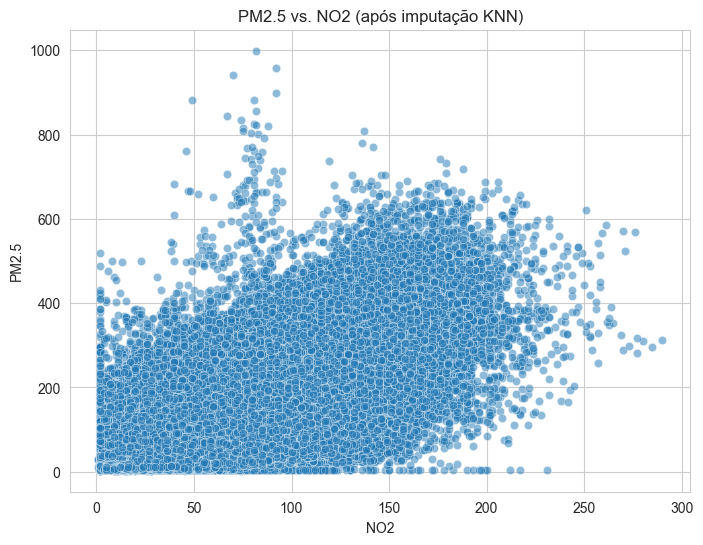

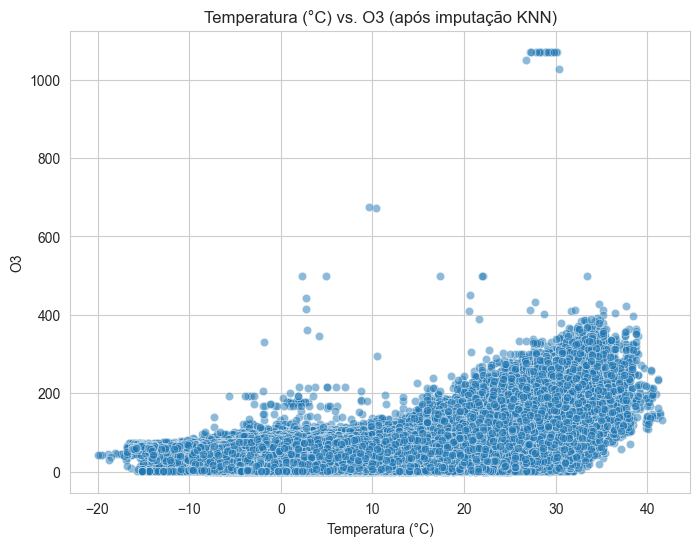

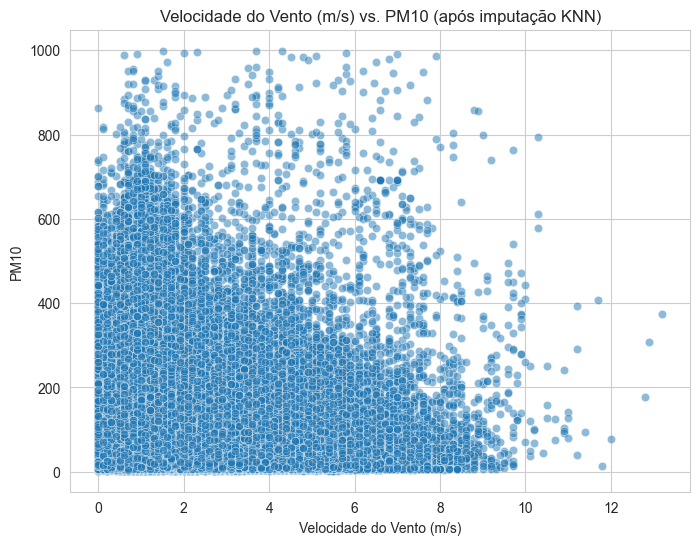

In [24]:
# Matriz de Correlação e scatter plots após imputação KNN

# Usar o DataFrame numérico após imputação KNN
numeric_df_knn = df_imputed_knn.drop(columns=["station", "wd", "datetime"], errors="ignore")

# Matriz de correlação
correlation_matrix_knn = numeric_df_knn.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_knn, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas após Imputação KNN')
plt.show()

# Scatter plots entre algumas variáveis de interesse
# Exemplos: PM2.5 vs. NO2, TEMP vs. O3, WSPM vs. PM10

# Exemplo 1: PM2.5 vs. NO2
if 'PM2.5' in numeric_df_knn.columns and 'NO2' in numeric_df_knn.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='NO2', y='PM2.5', data=numeric_df_knn, alpha=0.5)
    plt.title('PM2.5 vs. NO2 (após imputação KNN)')
    plt.xlabel('NO2')
    plt.ylabel('PM2.5')
    plt.grid(True)
    plt.show()

# Exemplo 2: TEMP vs. O3
if 'TEMP' in numeric_df_knn.columns and 'O3' in numeric_df_knn.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TEMP', y='O3', data=numeric_df_knn, alpha=0.5)
    plt.title('Temperatura (°C) vs. O3 (após imputação KNN)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('O3')
    plt.grid(True)
    plt.show()

# Exemplo 3: WSPM vs. PM10
if 'WSPM' in numeric_df_knn.columns and 'PM10' in numeric_df_knn.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='WSPM', y='PM10', data=numeric_df_knn, alpha=0.5)
    plt.title('Velocidade do Vento (m/s) vs. PM10 (após imputação KNN)')
    plt.xlabel('Velocidade do Vento (m/s)')
    plt.ylabel('PM10')
    plt.grid(True)
    plt.show()

🧭 7. Análise de Direção e Velocidade do Vento
Técnicas:

Agrupar por direção de vento (wd)

Analisar distribuição com rose plots ou barplots

Por quê: A direção do vento afeta a dispersão de poluentes.

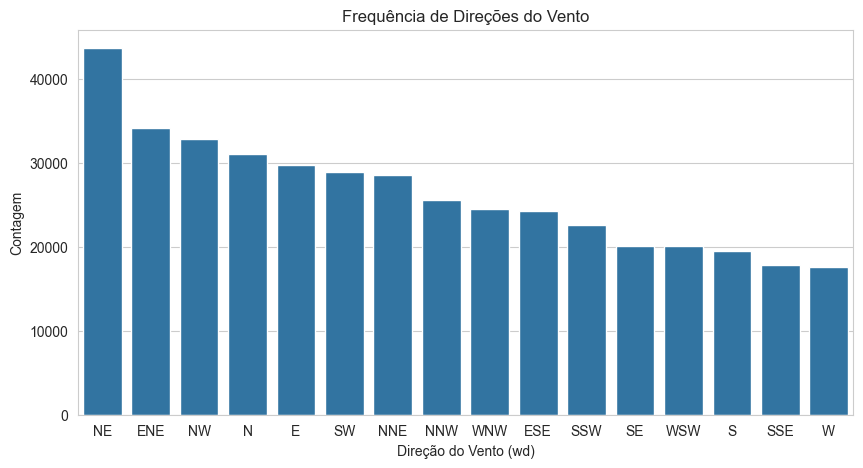

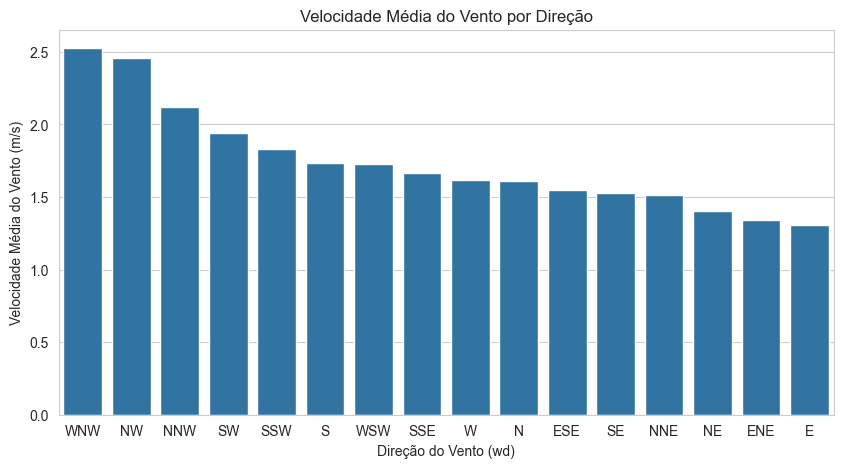

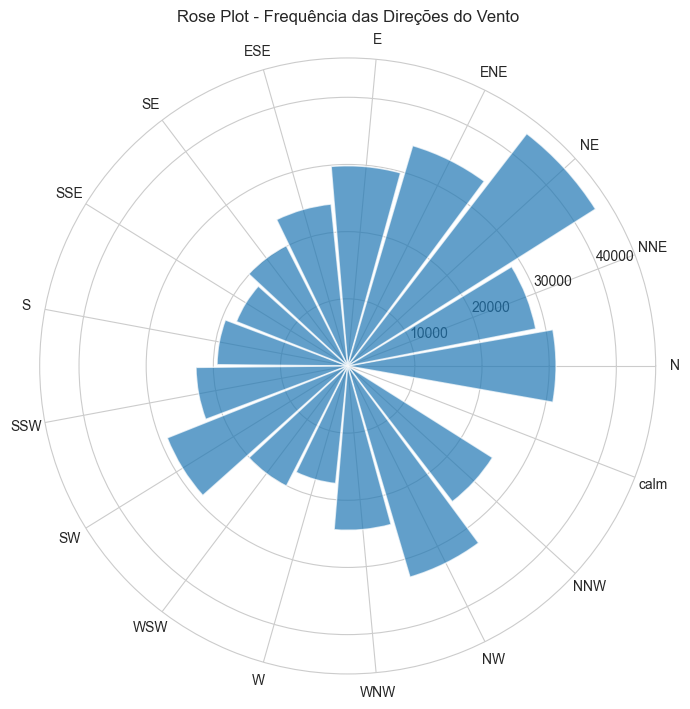

In [25]:
# Análise de Direção e Velocidade do Vento após imputação
# Agrupar por direção do vento (wd) e calcular estatísticas da velocidade do vento (WSPM)
wind_group = df_imputed_knn.groupby('wd')['WSPM'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Barplot: Frequência de cada direção do vento
plt.figure(figsize=(10, 5))
sns.barplot(x='wd', y='count', data=wind_group, order=wind_group.sort_values('count', ascending=False)['wd'])
plt.title('Frequência de Direções do Vento')
plt.xlabel('Direção do Vento (wd)')
plt.ylabel('Contagem')
plt.show()

# Barplot: Velocidade média do vento por direção
plt.figure(figsize=(10, 5))
sns.barplot(x='wd', y='mean', data=wind_group, order=wind_group.sort_values('mean', ascending=False)['wd'])
plt.title('Velocidade Média do Vento por Direção')
plt.xlabel('Direção do Vento (wd)')
plt.ylabel('Velocidade Média do Vento (m/s)')
plt.show()

# Rose plot (gráfico polar) da frequência das direções do vento
# Mapear direções para ângulos (ajuste conforme as categorias do seu dataset)
# Definir mapeamento de direções para ângulos (exemplo comum para dados chineses)
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'calm']
angles = np.linspace(0, 2 * np.pi, len(directions), endpoint=False)
direction_map = dict(zip(directions, angles))

# Adicionar ângulo ao DataFrame
wind_group['angle'] = wind_group['wd'].map(direction_map)

# Remover direções não mapeadas (caso existam)
wind_group = wind_group.dropna(subset=['angle'])

# Rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(wind_group['angle'], wind_group['count'], width=0.35, align='center', alpha=0.7)
ax.set_xticks(angles)
ax.set_xticklabels(directions, fontsize=10)
ax.set_title('Rose Plot - Frequência das Direções do Vento', va='bottom')
plt.show()

📌 8. Comparação entre Estações
Técnicas:

Agrupar por station

Boxplots comparativos por estação

Mapas de calor por estação/tempo

Por quê: Avaliar diferenças geográficas na poluição e clima.

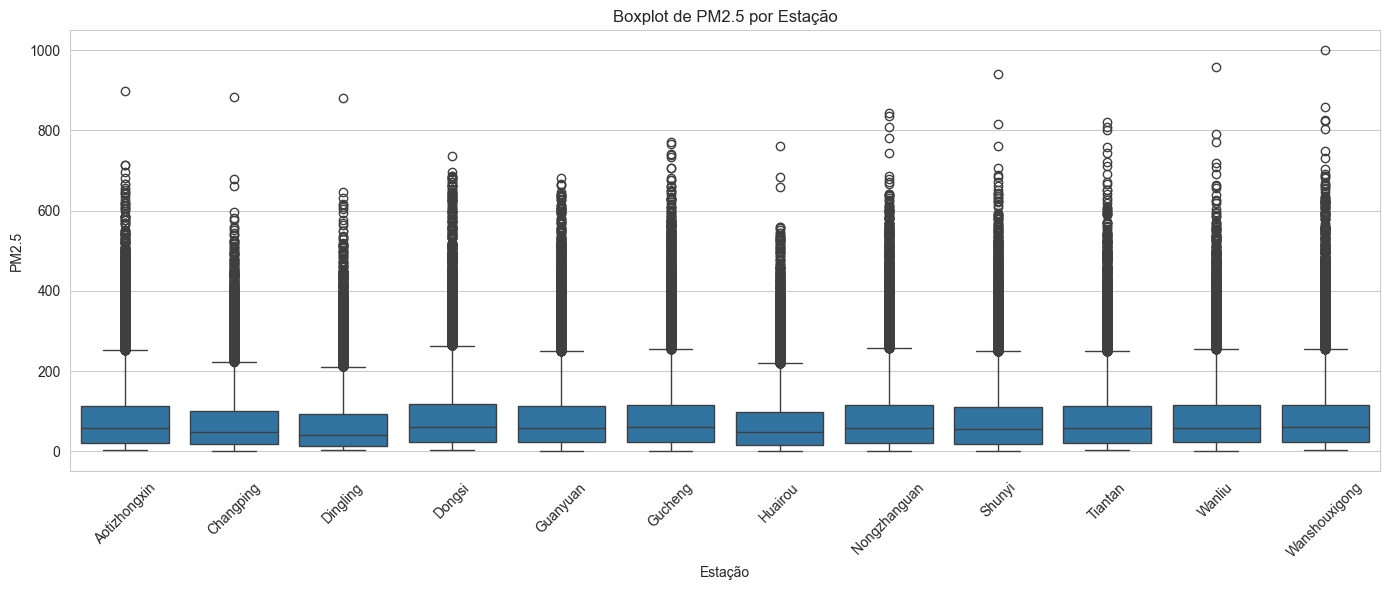

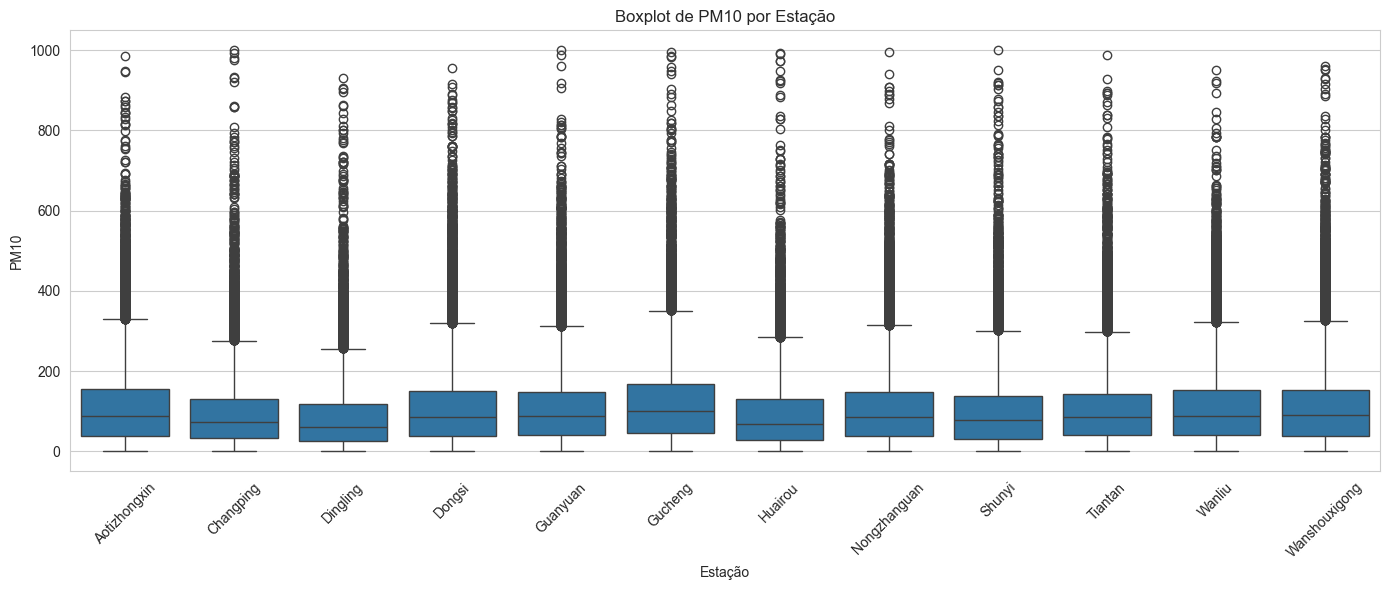

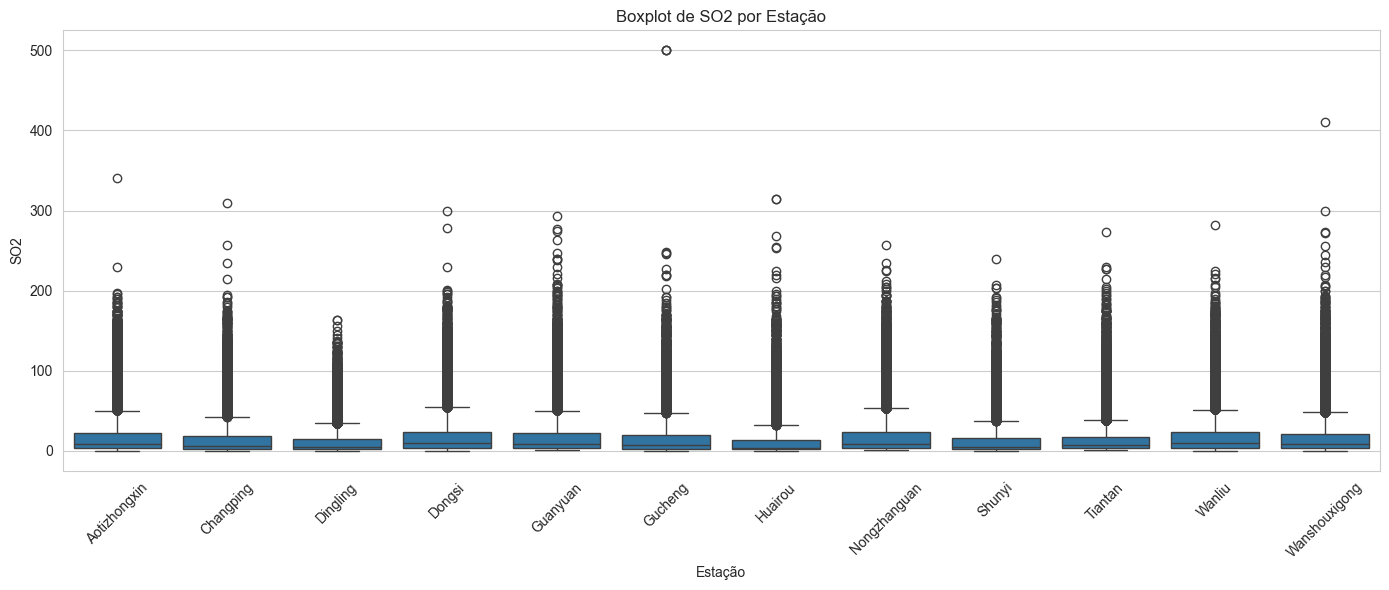

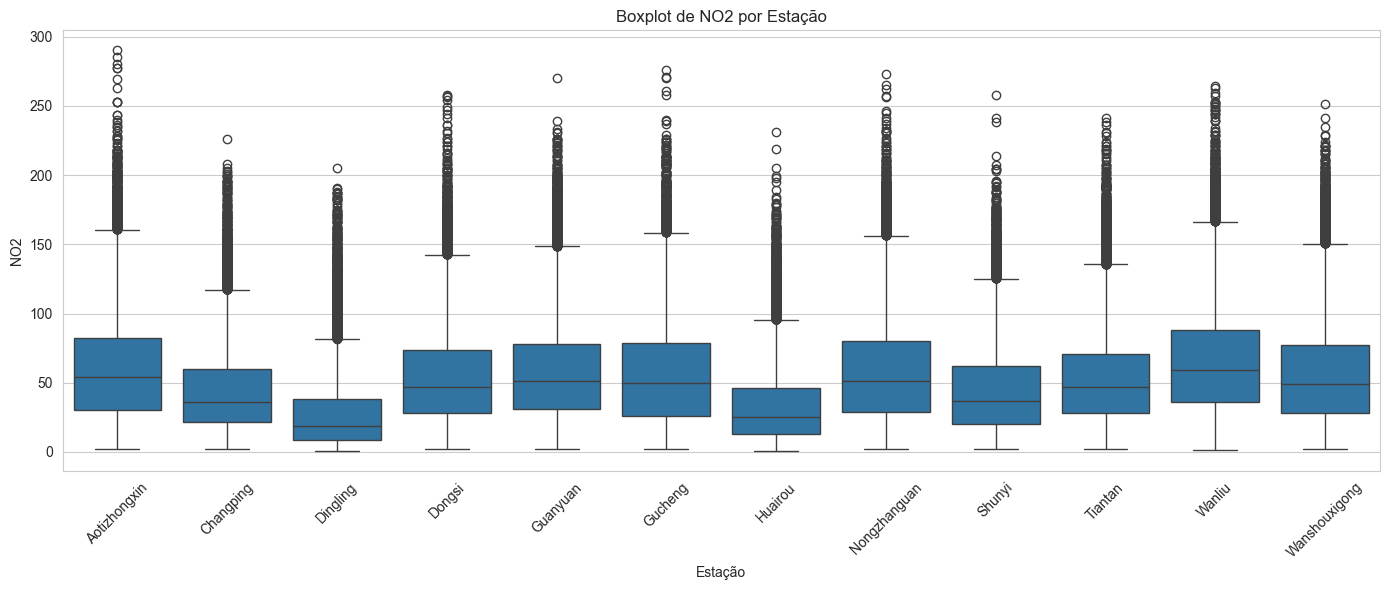

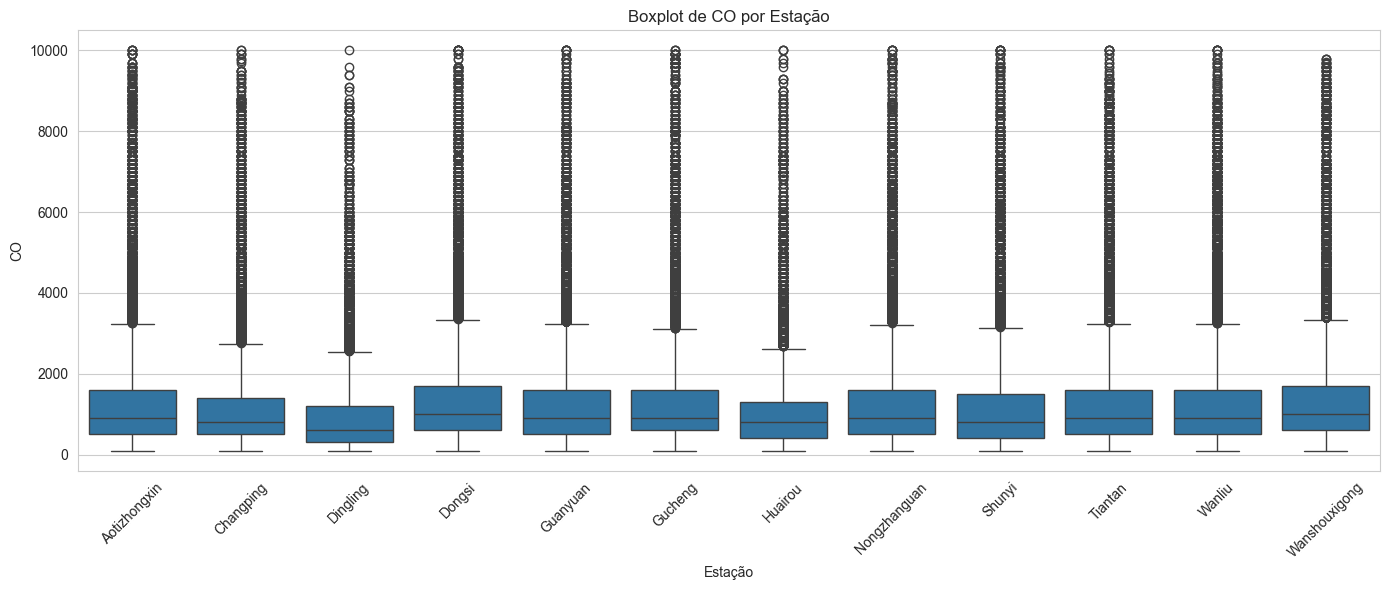

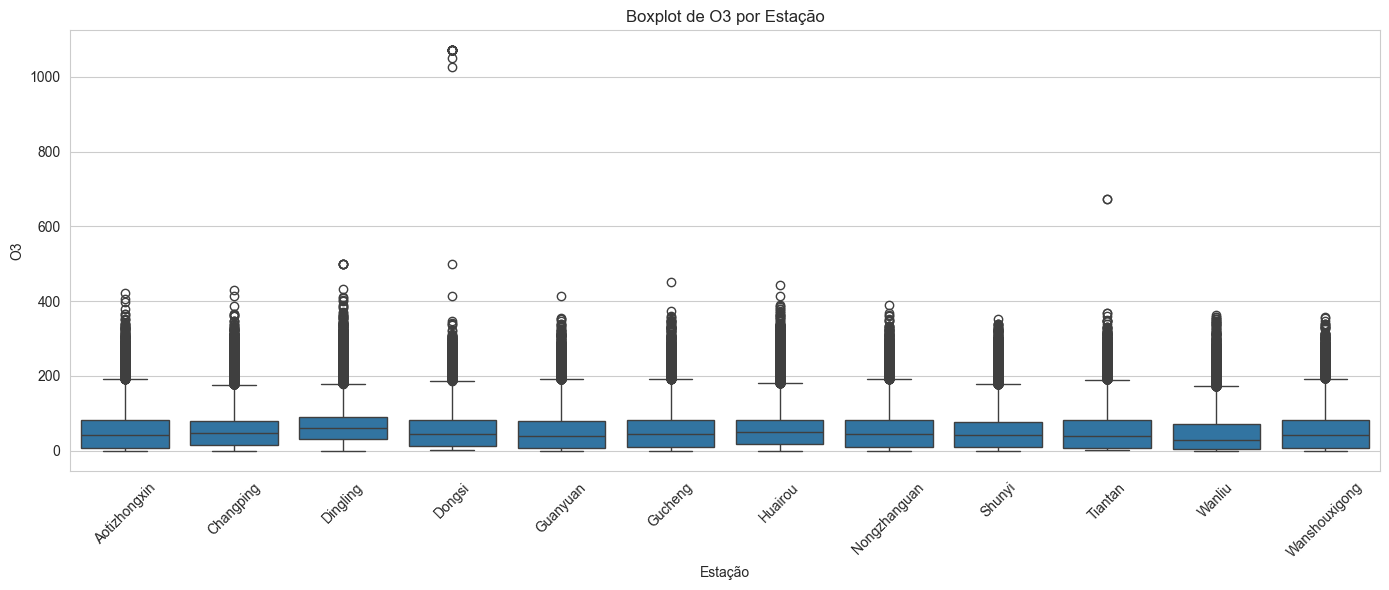

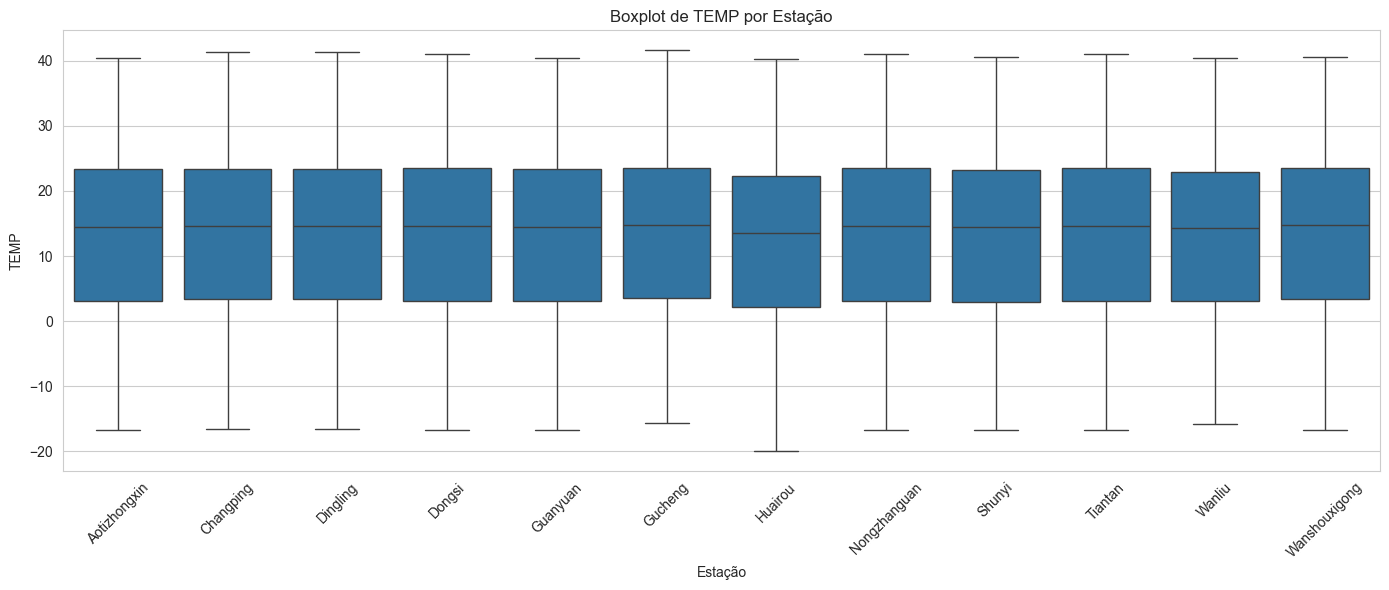

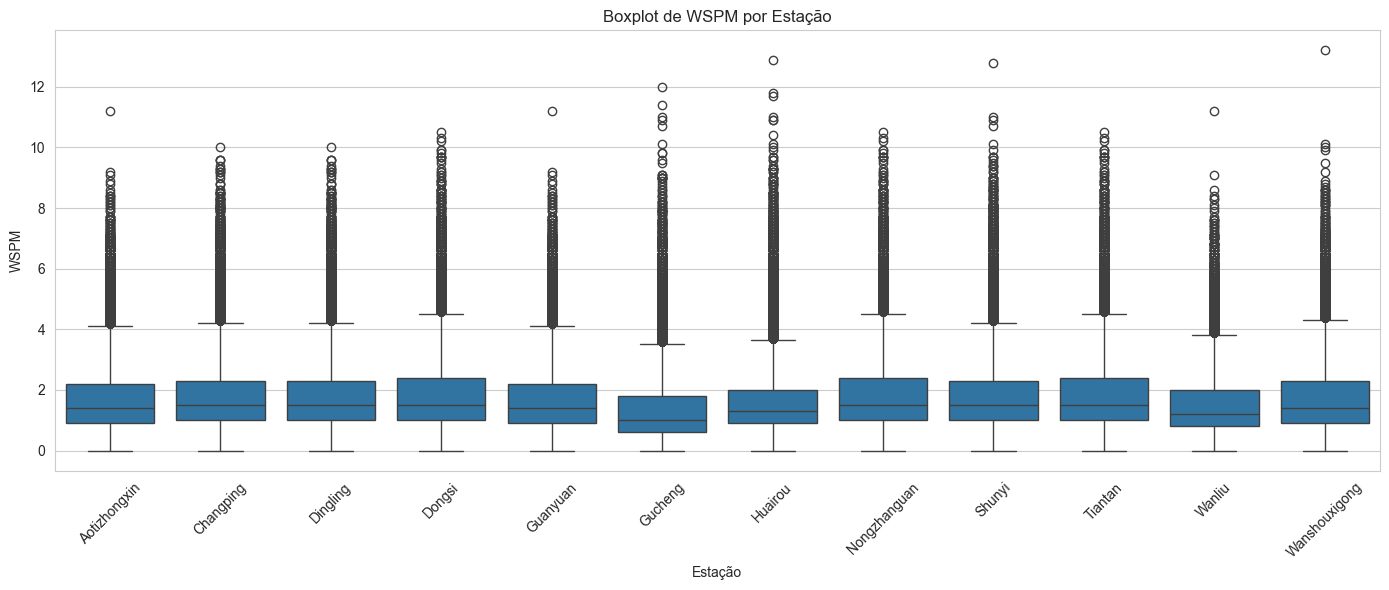

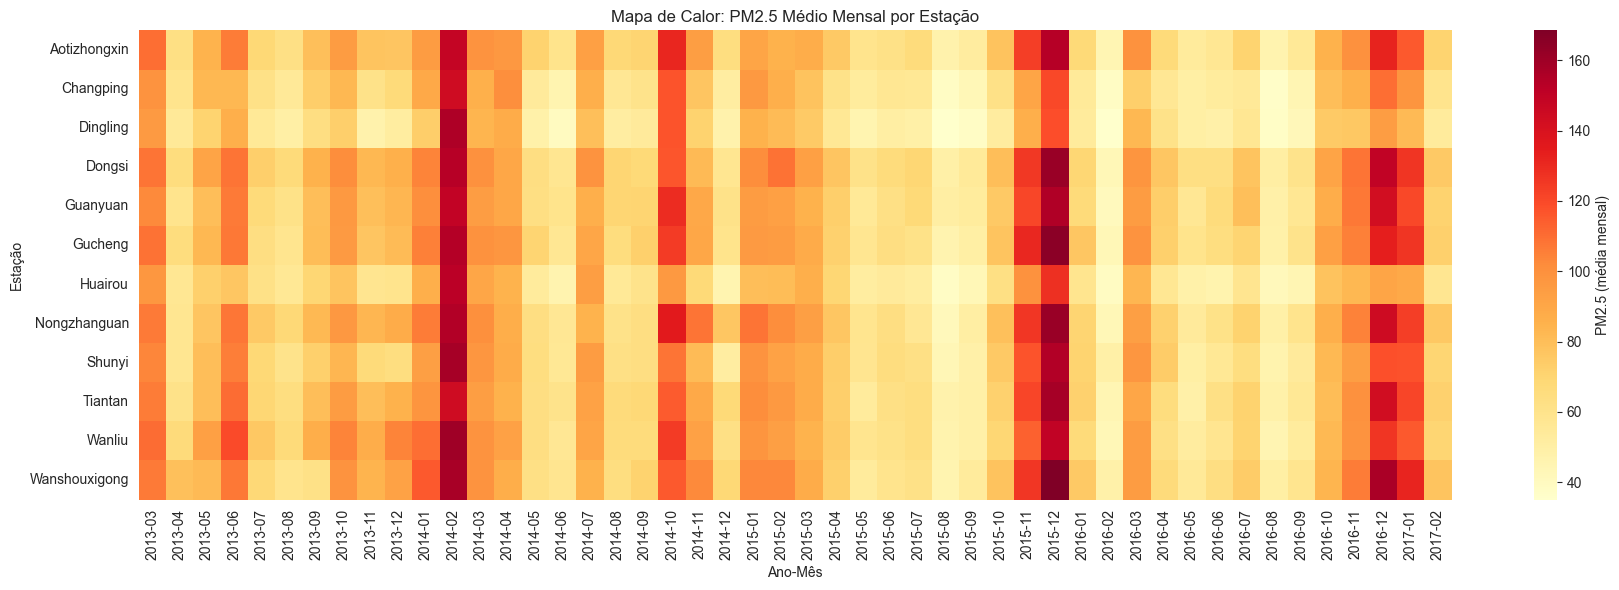

In [27]:
# Boxplots comparativos por estação para variáveis de interesse
variaveis_boxplot = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "WSPM"]
variaveis_boxplot = [v for v in variaveis_boxplot if v in df_imputed_knn.columns]

for var in variaveis_boxplot:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="station", y=var, data=df_imputed_knn)
    plt.title(f'Boxplot de {var} por Estação')
    plt.xlabel('Estação')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mapa de calor: média mensal de PM2.5 por estação
if "PM2.5" in df_imputed_knn.columns and "datetime" in df_imputed_knn.columns:
    df_imputed_knn['month'] = df_imputed_knn['datetime'].dt.to_period('M')
    pm25_pivot = df_imputed_knn.pivot_table(
        index='station', columns='month', values='PM2.5', aggfunc='mean'
    )
    plt.figure(figsize=(18, 6))
    sns.heatmap(pm25_pivot, cmap='YlOrRd', annot=False, cbar_kws={'label': 'PM2.5 (média mensal)'})
    plt.title('Mapa de Calor: PM2.5 Médio Mensal por Estação')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Estação')
    plt.tight_layout()
    plt.show()

🔄 9. Criação de Variáveis Derivadas
Técnicas:

Índice de qualidade do ar (AQI)

Variáveis sazonais (primavera, verão...)

Por quê: Agrega valor analítico para predição e visualização.

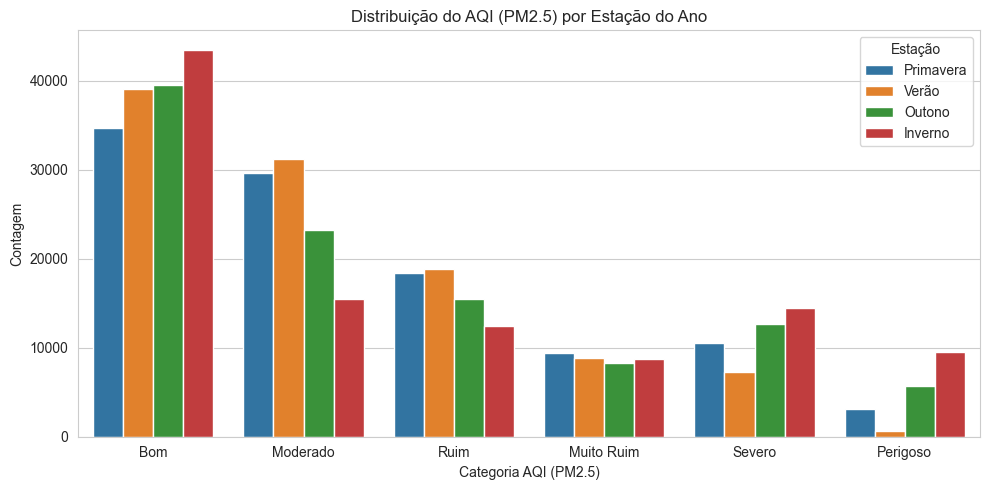

In [28]:
# AQI simplificado baseado em PM2.5 (padrão China MEP)
def calc_aqi_pm25(pm25):
    if pm25 <= 35:
        return "Bom"
    elif pm25 <= 75:
        return "Moderado"
    elif pm25 <= 115:
        return "Ruim"
    elif pm25 <= 150:
        return "Muito Ruim"
    elif pm25 <= 250:
        return "Severo"
    else:
        return "Perigoso"

df_imputed_knn['AQI_PM25'] = df_imputed_knn['PM2.5'].apply(calc_aqi_pm25)

# Variável sazonal (primavera, verão, outono, inverno) para o hemisfério norte
def get_season(month):
    if month in [3, 4, 5]:
        return "Primavera"
    elif month in [6, 7, 8]:
        return "Verão"
    elif month in [9, 10, 11]:
        return "Outono"
    else:
        return "Inverno"

df_imputed_knn['season'] = df_imputed_knn['datetime'].dt.month.apply(get_season)

# Exemplo de visualização: distribuição do AQI por estação
plt.figure(figsize=(10, 5))
sns.countplot(x='AQI_PM25', hue='season', data=df_imputed_knn, order=["Bom", "Moderado", "Ruim", "Muito Ruim", "Severo", "Perigoso"])
plt.title('Distribuição do AQI (PM2.5) por Estação do Ano')
plt.xlabel('Categoria AQI (PM2.5)')
plt.ylabel('Contagem')
plt.legend(title='Estação')
plt.tight_layout()
plt.show()